In [254]:
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
plt.style.use('ggplot')

%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'C:\Users\zio_p\PycharmProjects\pythonProject\AtA - Correlation Project\movies.csv')

In [255]:
# Visualize top 5 rows

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [256]:
# Check for null values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [257]:
# Replace Nulls with zeros

df = df.fillna(0)

In [258]:
# Show item types per column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [259]:
# Remove decimal for columns reported as integers

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [260]:
# Create new year column to fix discrepancies between year in release date column and year in release year column

df[['release_date', 'ry+loc']] = df['released'].str.split(', ', expand=True)
df['ry+loc'] = df['ry+loc'].fillna('0000000 (  )')
df['corrected_year'] = df['ry+loc'].astype(str).str[:4]

df['corrected_year'].head()


0    1980
1    1980
2    1980
3    1980
4    1980
Name: corrected_year, dtype: object

In [261]:
# Sort by a category. 

df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,ry+loc,corrected_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,December 18,2009 (United States),2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,April 26,2019 (United States),2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,December 19,1997 (United States),1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,December 18,2015 (United States),2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,April 27,2018 (United States),2018


In [262]:
# Show all rows

pd.set_option('display.max_rows', None)

In [263]:
# Remove Duplicates

df.drop_duplicates().sort_values(by=['budget'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,ry+loc,corrected_year
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,April 26,2019 (United States),2019
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,April 27,2018 (United States),2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152,December 15,2017 (United States),2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169,May 25,2007 (United States),2007
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120,November 17,2017 (United States),2017


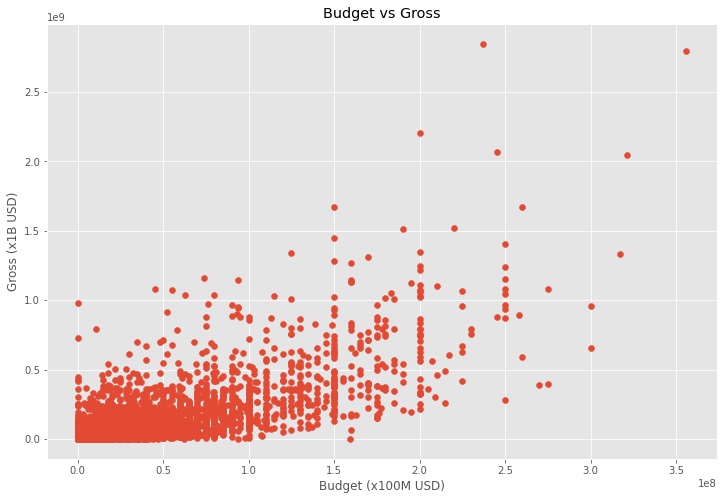

In [264]:
# Scatterplot to compare data:

# Plot Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget (x100M USD)')
plt.ylabel('Gross (x1B USD)')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

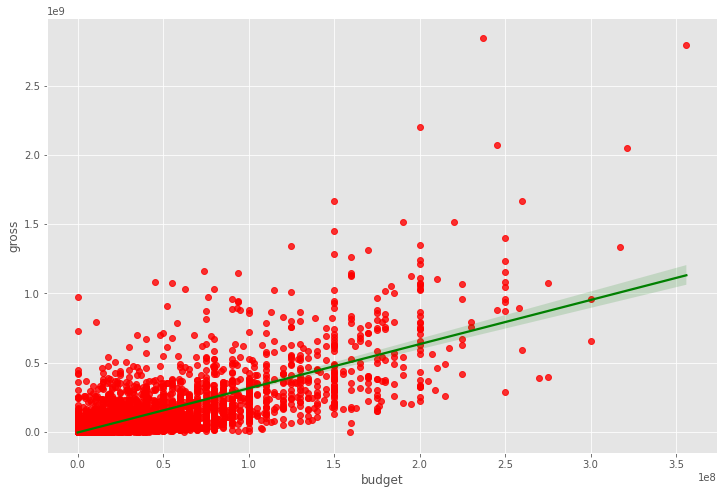

In [265]:
# Plot Budget vs Gross (Seaborn)

sb.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"green"})

In [266]:
# (Numerical) Correlation numbers: Budget and Gross
#     Method = pearson / kendall / spearman
df.corr(method='pearson') 


,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


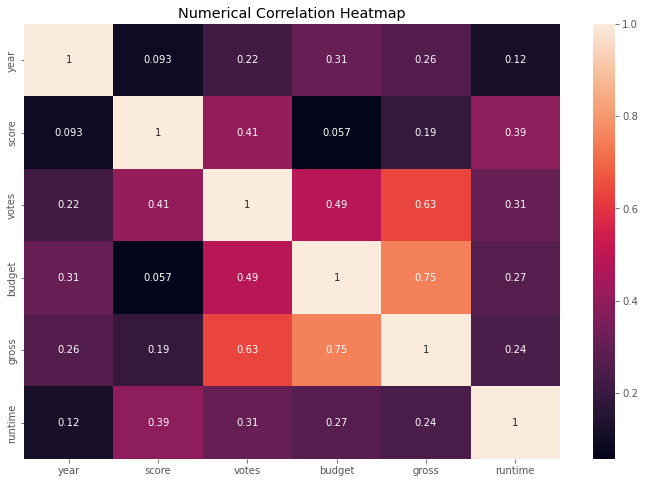

In [267]:
# Visualization of numerical correlation via heatmap

corr_matrix = df.corr(method='pearson')
plt.title("Numerical Correlation Heatmap")
sb.heatmap(corr_matrix, annot=True)
plt.show()

In [268]:
# Non Numerical Correlation 

# Assign Number to non numerical data types

df_num = df.copy()

for col in df_num.columns:
    if df_num[col].dtype == 'object':
        df_num[col] = df_num[col].astype('category')
        df_num[col] = df_num[col].cat.codes
df_num.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,ry+loc,corrected_year
0,6587,7,6,1980,1706,8.4,927000,2589,4015,1048,55,19000000,46998772,2320,146,212,4,1
1,5573,7,1,1980,1493,5.8,65000,2269,1633,328,56,4500000,58853106,732,104,188,4,1
2,5142,5,0,1980,1772,8.7,1200000,1111,2568,1746,56,18000000,538375067,1541,124,223,4,1
3,286,5,4,1980,1493,7.7,221000,1301,2001,2247,56,3500000,83453539,1813,88,188,4,1
4,1027,7,4,1980,1544,7.3,108000,1054,522,411,56,6000000,39846344,1778,98,194,4,1


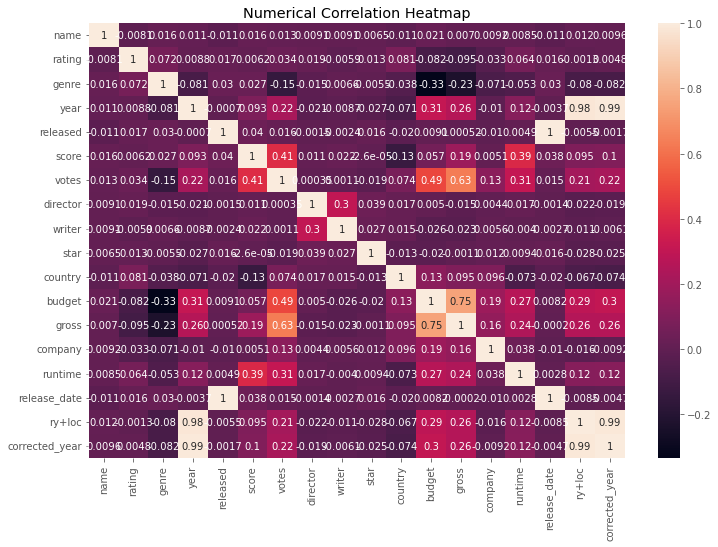

In [269]:
corr_matrix_num = df_num.corr(method='pearson')
plt.title("Numerical Correlation Heatmap")
sb.heatmap(corr_matrix_num, annot=True)
plt.show()

In [271]:
# Popping up highest correlation pairs excluding equivalents and date corrections
corr_mat = df_num.corr()

corr_pairs = corr_mat.unstack()
sort_pairs = corr_pairs.sort_values()
high_corr = sort_pairs[(sort_pairs > 0.5) & (sort_pairs < .98)]

high_corr

gross   votes     0.632870
votes   gross     0.632870
gross   budget    0.750157
budget  gross     0.750157
dtype: float64